# Cleaning and EDA of Goodreads

Goodreads is a social cataloging website that allows individuals to freely search its database of books, annotations, and reviews. Users can sign up and register books to generate library catalogs and reading lists. They can also create their own groups of book suggestions, surveys, polls, blogs, and discussions. The website's offices are located in San Francisco.The company is owned by the online retailer Amazon.

Goodreads was founded in December 2006 and launched in January 2007 by Otis Chandler, a software engineer and entrepreneur, and then, Elizabeth Khuri (Now Elizabeth Khuri Chandler), a journalist at the Los Angeles Times The website grew rapidly in popularity after being launched. In December 2007, the site had over 650,000 members and over 10,000,000 books had been added.By July 2012, the site reported 10 million members, 20 million monthly visits, and 30 employees. On July 23, 2013, it was announced on their website that the user base had grown to 20 million members, having doubled in close to 11 months. On March 28, 2013, Amazon announced its acquisition of Goodreads.

About 6000 odd "best books" were fetched and parsed from Goodreads. The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file

<img src="goodreads.png">

Reading in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
plt.rcParams["figure.figsize"] = (8,8)

In [3]:
df = pd.read_csv("data/goodreads.csv",header=None,names=['rating','review_count','isbn','booktype','author_url','year','genre_urls','dir','rating_count','name'])

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


In [6]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice that `review_count` and `rating_counts` are objects instead of ints, and the `year` is a float!

In [7]:
df[df.rating.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


In [8]:
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


In [9]:
df = df[df.year.notnull()]

In [10]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [11]:
print(df.isnull().sum())

rating            0
review_count      0
isbn            471
booktype          0
author_url        0
year              0
genre_urls       59
dir               0
rating_count      0
name              0
dtype: int64


In [12]:
df[df.genre_urls.isnull()].head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
953,4.56,27,1477276068,good_reads:book,https://www.goodreads.com/author/show/6621980....,2012.0,NaN,dir10/16243767-crossing-the-seas.html,90,Crossing the Seas
1515,4.56,8,NaN,good_reads:book,https://www.goodreads.com/author/show/394525.T...,2013.0,NaN,dir16/18136407-crashing-down-to-earth.html,75,Crashing Down to Earth
1693,4.21,7,NaN,good_reads:book,https://www.goodreads.com/author/show/3110785._,2009.0,NaN,dir17/7425765.html,67,Ð¡Ð»ÑÐ½ÑÐµ Ð½ÐµÐ´Ð¾ÑÐµÐ³Ð°ÐµÐ¼Ð¾
1752,3.85,41,140921818X,good_reads:book,https://www.goodreads.com/author/show/7337562....,13.0,NaN,dir18/5548850-the-day-jesus-rode-into-croydon....,94,The Day Jesus Rode Into Croydon
1942,4.66,8,0992382009,good_reads:book,https://www.goodreads.com/author/show/7574275....,2014.0,NaN,dir20/19532388-letters-from-your-soul.html,29,Letters from your soul


In [13]:
df.genre_urls.fillna('unknown',inplace=True)

In [14]:
df.isbn.fillna(0,inplace=True)

In [15]:
df.isnull().sum()

rating          0
review_count    0
isbn            0
booktype        0
author_url      0
year            0
genre_urls      0
dir             0
rating_count    0
name            0
dtype: int64

In [16]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [17]:
df.shape

(5993, 10)

In [18]:
df.review_count = df.review_count.astype('int')
df.year = df.year.astype('int')
df.rating_count = df.rating_count.astype('int')

#### Some Questions we are trying to answer here 
* Which are the best books?
* Is finction more popular than fantasy? 
* Is J K Rowling the highest rated author?
* What are the trends in popularity of genres
* Which genre is more popular now vs 100 years ago?

We will need author and genre to proceed! so we will Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

In [19]:
df.author_url[0].split('/')[-1].split('.')[1:][0]

'Suzanne_Collins'

Writing a function to extract the `author` name from the `author_URL`

In [20]:
def get_author(url):
    return url.split('/')[-1].split('.')[-1]

df['author'] = df.author_url.map(get_author)

In [21]:
df.author.unique()[0:5]

array(['Suzanne_Collins', 'J_K_Rowling', 'Stephenie_Meyer', 'Harper_Lee',
       'Jane_Austen'], dtype=object)

In [22]:
df.genre_urls[0].split('|')[1].split('/')[-1]

'science-fiction'

Writing a function to extract the `genres` name from the `genres_URL` , The function will also remove duplicates in the genres

In [23]:
def get_genre(url):
    split = url.strip().split('|')
    genres = [g.split('/')[-1] for g in split]
    genres = set(genres)
    return '|'.join(genres)

df["genres"] = df.genre_urls.map(get_genre)

In [24]:
df.genres[0]

'teen|science-fiction|apocalyptic|dystopia|romance|post-apocalyptic|book-club|young-adult|action|adventure|fantasy'

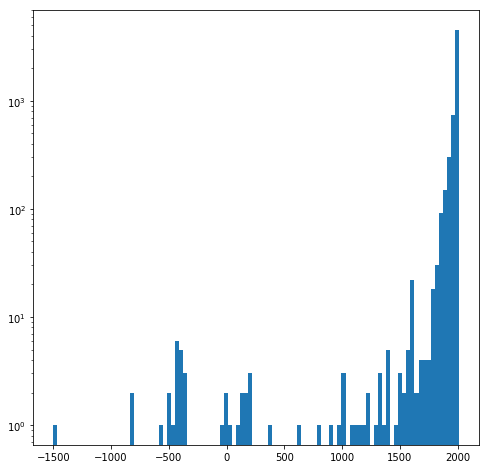

In [25]:
histo = plt.hist(df.year,log=True,bins = 100)

Hmm.... Its a Bit strange that we have negative Years in the data set. With a little google search of these books i found that these are the books written before the common Era , those may be from before BC

In [26]:
df[df.year<0][['year','name']].head()

,year,name
47,-800,The Odyssey
246,-800,The Iliad/The Odyssey
455,-380,The Republic
596,-29,The Aeneid
629,-429,Oedipus Rex


In [27]:
df.describe()

,rating,review_count,year,rating_count
count,5993.000000,5993.000000,5993.000000,5.993000e+03
mean,4.041997,2374.331220,1969.085099,5.118390e+04
std,0.260509,5493.093328,185.383169,1.376493e+05
min,2.000000,0.000000,-1500.000000,5.000000e+00
25%,3.870000,390.000000,1980.000000,7.527000e+03
50%,4.050000,936.000000,2002.000000,1.807200e+04
75%,4.210000,2212.000000,2009.000000,4.294300e+04
max,5.000000,136455.000000,2014.000000,2.958974e+06


We Notice that the oldest book in this dataset is `The Epic of Gilgamesh` , with a Little Wikipedia we founf that it was written BC
<img src="oldest.jpg">

#### Findind the best book by year

In [28]:
for year,subset in df.groupby('year'):
    bestbook = subset[subset.rating == subset.rating.max()]
    if bestbook.shape[0] >1:
        print(year,bestbook.name.values,bestbook.rating.values)
    else:
        print(year,bestbook.name.values[0],bestbook.rating.values[0])

-1500 The Epic of Gilgamesh 3.6
-800 The Iliad/The Odyssey 4.01
-560 Aesop's Fables 4.03
-512 The Art of War 3.92
-500 The Bhagavad Gita 4.06
-458 The Oresteia 3.96
-442 Antigone 3.52
-440 The Histories 3.94
-431 Medea 3.8
-429 Oedipus Rex 3.64
-411 The History of the Peloponnesian War 3.84
-400 Complete Works 4.3
-390 Apology 4.11
-380 The Republic 3.85
-370 The Symposium 3.99
-360 Five Dialogues 4.07
-350 The Nicomachean Ethics 3.88
-29 The Aeneid 3.77
4 The Seven Spiritual Laws of Success 4.04
8 Metamorphoses 4.01
13 The Day Jesus Rode Into Croydon 3.85
100 The New Oxford Annotated Bible, New Revised Standard Version 4.3
121 The Twelve Caesars 4.02
130 Holy Bible 4.45
158 The Golden Ass 3.88
174 Meditations 4.16
200 The Garden of Eden 3.75
201 Fe Fi FOE Comes 4.37
213 NaÃ¯ve. Super 3.9
397 Confessions 3.82
632 The Quran 4.37
800 Beowulf 3.38
900 The Arabian Nights 4.04
968 La BÃªte humaine (Les Rougon-Macquart, #17) 4.02
1002 The Pillow Book 4.04
1008 The Tale of Genji 3.68
1010 Sha

1987 Calvin and Hobbes 4.61
1988 The Essential Calvin and Hobbes 4.64
1989 The Hobbit 4.48
1990 The Authoritative Calvin And Hobbes 4.7
1991 Rain of Gold 4.49
1992 The Indispensable Calvin and Hobbes 4.71
1993 Mark of the Lion Trilogy 4.75
1994 The Complete Aubrey/Maturin Novels (5 Volumes) 4.69
1995 The Calvin and Hobbes Tenth Anniversary Book 4.63
1996 Calvin and Hobbes 4.75
1997 The Song of the Lioness Quartet (Song of the Lioness, #1-4) 4.57
1998 Harry Potter Boxset (Harry Potter, #1-7) 4.73
1999 The Harry Potter Collection (Harry Potter, #1-4) 4.63
2000 Standing for Something 4.64
2001 A Storm of Swords (A Song of Ice and Fire, #3-1) 4.5
2002 Way to Be! 4.62
2003 The Complete Far Side, 1980-1994 4.66
2004 Ù¾ÛØ±Ù Ú©Ø§ÙÙ 4.58
2005 The Complete Calvin and Hobbes 4.8
2006 Warriors Boxed Set (Warriors, #1-3) 4.67
2007 ESV Study Bible 4.76
2008 The Absolute Sandman, Vol. 4 4.75
2009 Black Dagger Brotherhood 4.69
2010 The Years Distilled 4.93
2011 Family Secrets 5.0
2012 ['A Book Abo

In [29]:
genres = []
for g in df.genres:
    splits = g.strip().split('|')
    [genres.append(i) for i in splits]
len(genres)

58939

In [30]:
genres = set(genres)
genres = sorted(genres)
len(genres)

538

In [31]:
genres[0:5]

['14th-century',
 '15th-century',
 '16th-century',
 '17th-century',
 '18th-century']

In [32]:
for gen in genres:
    df["genres:"+gen] = [gen in g.split('|') for g in df.genres]

In [33]:
df.shape

(5993, 550)

In [34]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres,genres:14th-century,genres:15th-century,genres:16th-century,genres:17th-century,genres:18th-century,genres:19th-century,genres:20th-century,genres:abuse,genres:academia,genres:academic,genres:action,genres:activism,genres:adolescence,genres:adoption,genres:adult,genres:adult-fiction,genres:adventure,genres:africa,genres:african-american,genres:african-american-literature,genres:african-literature,genres:aliens,genres:alternate-history,genres:american,genres:american-civil-war,genres:american-fiction,genres:american-history,genres:american-novels,genres:americana,genres:anarchism,genres:ancient,genres:angels,genres:animal-fiction,genres:animals,genres:anime,genres:anthologies,genres:anthropology,genres:anthropomorphic,...,genres:tragedy,genres:trans,genres:transgender,genres:travel,genres:travelogue,genres:true-crime,genres:true-story,genres:turkish,genres:turkish-literature,genres:ukraine,genres:unicorns,genres:united-states,genres:unknown,genres:urban-fantasy,genres:urban-planning,genres:urbanism,genres:us-presidents,genres:utopia,genres:vampires,genres:vegan,genres:video-games,genres:walking,genres:war,genres:weird-fiction,genres:werewolves,genres:western,genres:western-romance,genres:wicca,genres:wilderness,genres:wildlife,genres:witches,genres:wizards,genres:wolves,genres:womens,genres:womens-fiction,genres:womens-studies,genres:world-history,genres:world-war-ii,genres:writing,genres:x-men,genres:young-adult,genres:young-adult-contemporary,genres:young-adult-fantasy,genres:young-adult-historical-fiction,genres:young-adult-paranormal,genres:young-adult-romance,genres:young-adult-science-fiction,genres:young-readers,genres:zen,genres:zombies
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,teen|science-fiction|apocalyptic|dystopia|roma...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,magic|science-fiction-fantasy|childrens|fictio...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,teen|supernatural|urban-fantasy|romance|vampir...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,F

In [43]:
genreslist = ['genres:'+g for g in genres]

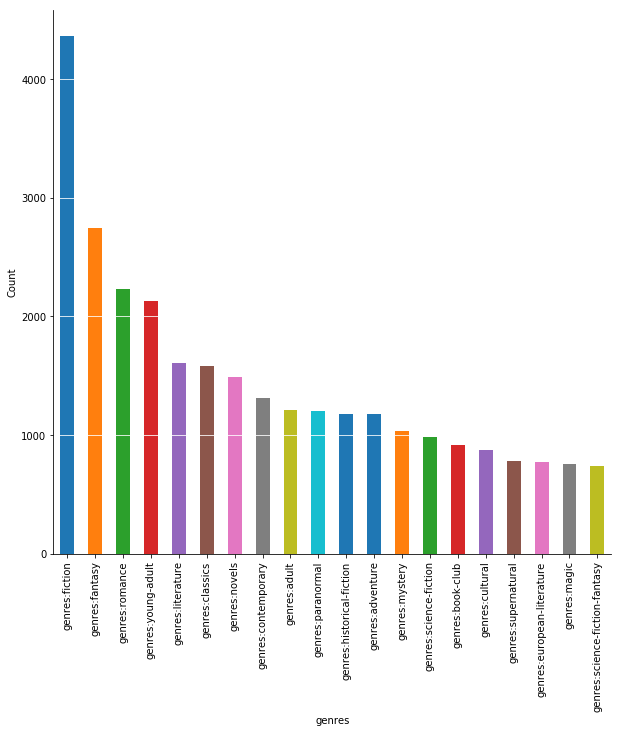

In [56]:
plt.figure(figsize=(10,10))
dfg = df[genreslist].sum().sort_values(ascending = False)
df[genreslist].sum().sort_values(ascending = False).iloc[0:20].plot(kind = 'bar')
sns.despine()
plt.xlabel("genres")
plt.ylabel("Count")
plt.grid(axis='y',color="white")

##### For each genre, we collect the years for which this genre's column is true and make a set of histograms. We fix our bins and plot the histograms against a grey histogram for the general increase in books in our dataset per year.

In [57]:
genres_wanted=dfg.index[dfg.values > 550]
print(genres_wanted.shape)
genres_wanted

(30,)


Index(['genres:fiction', 'genres:fantasy', 'genres:romance', 'genres:young-adult', 'genres:literature', 'genres:classics', 'genres:novels', 'genres:contemporary', 'genres:adult', 'genres:paranormal', 'genres:historical-fiction', 'genres:adventure', 'genres:mystery', 'genres:science-fiction', 'genres:book-club', 'genres:cultural', 'genres:supernatural', 'genres:european-literature', 'genres:magic', 'genres:science-fiction-fantasy', 'genres:adult-fiction', 'genres:childrens',
       'genres:urban-fantasy', 'genres:teen', 'genres:paranormal-romance', 'genres:thriller', 'genres:non-fiction', 'genres:humor', 'genres:womens-fiction', 'genres:chick-lit'],
      dtype='object')

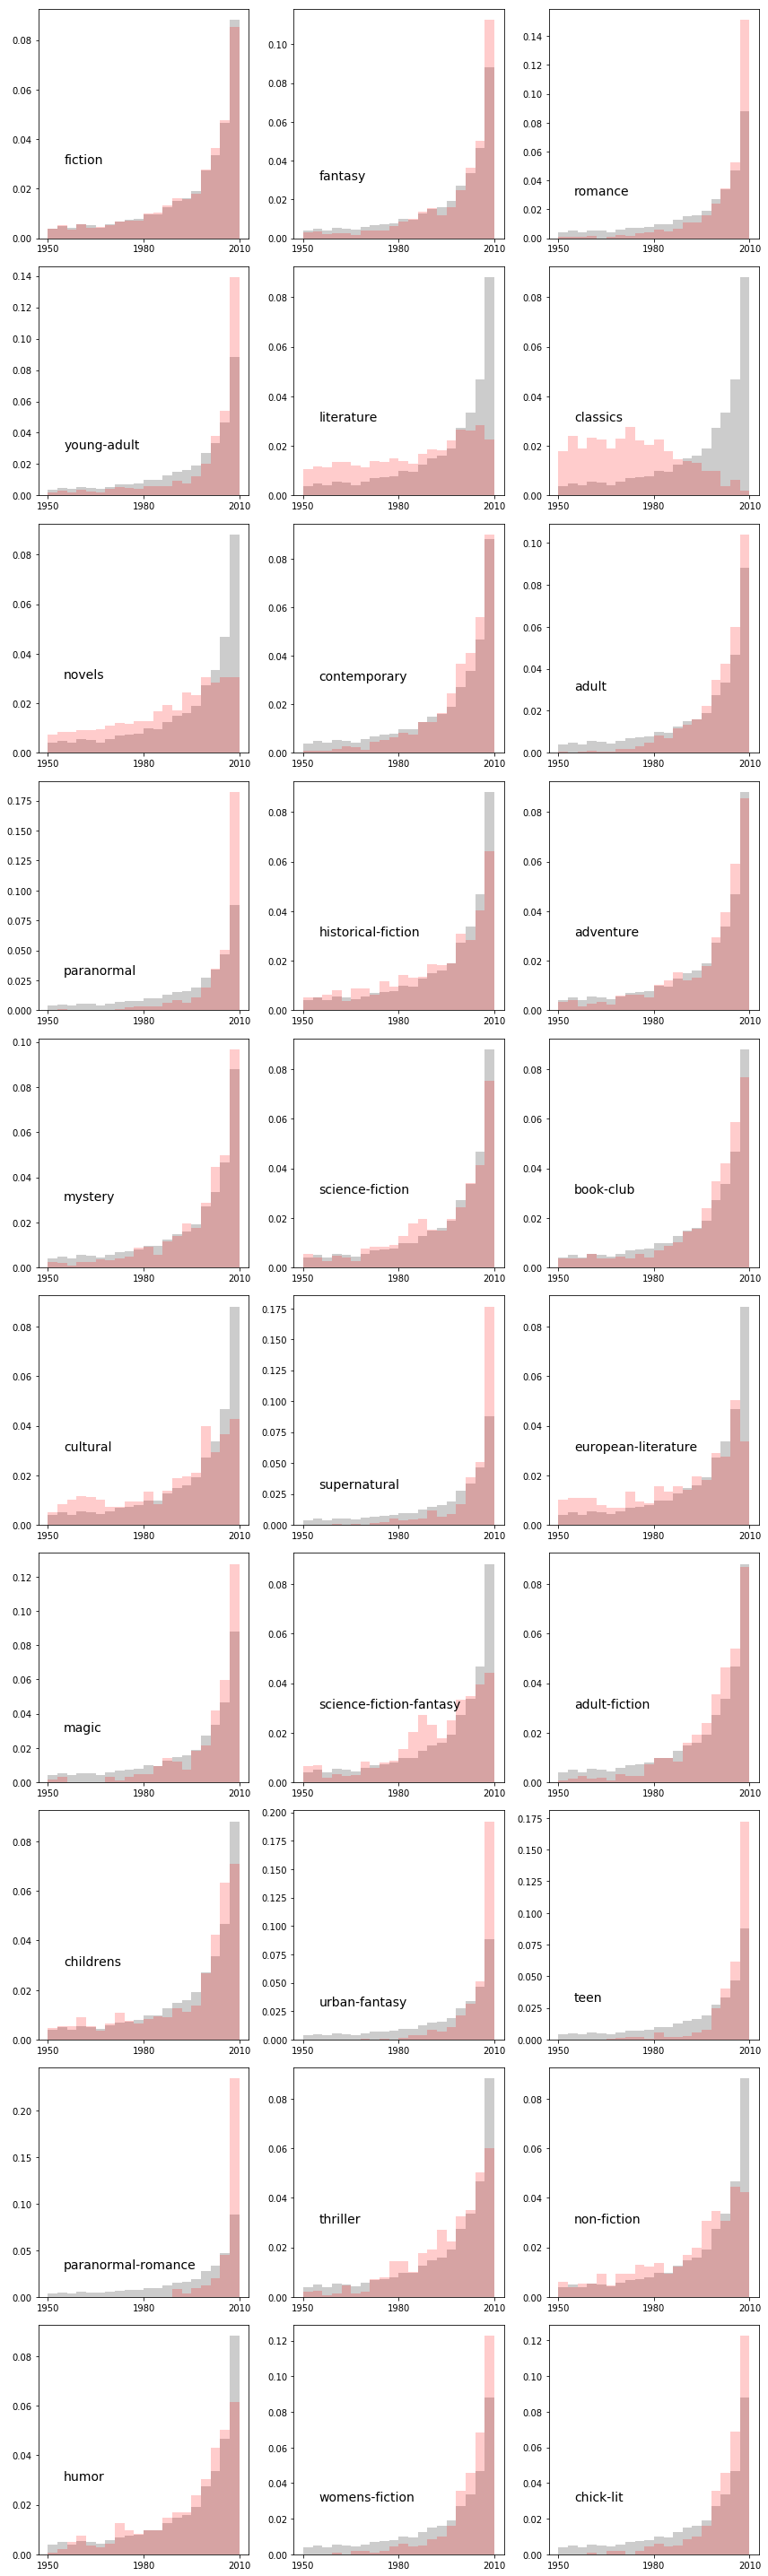

In [58]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 40), 
                         tight_layout=True)
bins = np.arange(1950, 2013, 3)
for ax, genre in zip(axes.ravel(), genres_wanted):
    ax.hist(df[df[genre] == True].year.values, 
            bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.2, ec='none')
    ax.hist(df.year, bins=bins, histtype='stepfilled', ec='None', normed=True, zorder=0, color='#cccccc')
    
    ax.annotate(genre.split(':')[-1], xy=(1955, 3e-2), fontsize=14)
    ax.xaxis.set_ticks(np.arange(1950, 2013, 30))

We see that the number of `classics` has decreased in recent years , This might be due to the fact that , a novel is classified as `classic` only if it is condisered noteworthy, it can attain that status only with time.`Literature` has remained constant throigh out the years.On the other hand `romance` and `fantasy` has skyrocketed in the recent years.